In [167]:
# Data Generation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from utils import generate_random_sales

# 1:
dates = pd.date_range(start='2025-01-01', periods=12, freq='MS')

# 2:
data = {
    'Date': dates,
    'Product_A': generate_random_sales(50, 100, 12),
    'Product_B': generate_random_sales(30, 80, 12),
    'Product_C': generate_random_sales(20, 60, 12),
    'Product_D': generate_random_sales(10, 50, 12)
}

# 3:
df_initial = pd.DataFrame(data)

# 4:
df_initial.to_csv('data/initial.csv', index=False)

print("Initial data: ")
df_initial

Initial data: 


,Date,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,66,52,43,10
1,2025-02-01,86,61,25,30
2,2025-03-01,92,54,46,40
3,2025-04-01,69,71,42,11
4,2025-05-01,68,44,33,26
5,2025-06-01,97,74,31,11
6,2025-07-01,75,39,25,29
7,2025-08-01,88,69,21,42
8,2025-09-01,50,73,24,43
9,2025-10-01,65,38,34,39


In [168]:
# Build DataFrame
# 1:
df = df_initial.copy()

df.rename(columns={'Date': 'Month'}, inplace=True)

# 2:
AllProducts = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

df['Total_Sales'] = df[AllProducts].sum(axis=1)
df['Average_Sales'] = df[AllProducts].mean(axis=1)
df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change() * 100
 # the first month in this column returns null (NaN) because it needs a month before it.

# 3:
def get_quarter(month):
    if month <= 3:   return 'Q1'
    elif month <= 6: return 'Q2'
    elif month <= 9: return 'Q3'
    else:            return 'Q4'

df['Quarter'] = df['Month'].dt.month.apply(get_quarter)

# 4:
df['Max_Sales_Product'] = df[AllProducts].idxmax(axis=1)
df['Min_Sales_Product'] = df[AllProducts].idxmin(axis=1)

# 5:
df.to_csv('data/final.csv', index=False)

df

,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,66,52,43,10,171,42.75,NaN,Q1,Product_A,Product_D
1,2025-02-01,86,61,25,30,202,50.50,18.128655,Q1,Product_A,Product_C
2,2025-03-01,92,54,46,40,232,58.00,14.851485,Q1,Product_A,Product_D
3,2025-04-01,69,71,42,11,193,48.25,-16.810345,Q2,Product_B,Product_D
4,2025-05-01,68,44,33,26,171,42.75,-11.398964,Q2,Product_A,Product_D
5,2025-06-01,97,74,31,11,213,53.25,24.561404,Q2,Product_A,Product_D
6,2025-07-01,75,39,25,29,168,42.00,-21.126761,Q3,Product_A,Product_C
7,2025-08-01,88,69,21,42,220,55.00,30.952381,Q3,Product_A,Product_C
8,2025-09-01,50,73,24,43,190,47.50,-13.636364,Q3,Product_B,Product_C
9,2025-10-01,65,38,34,39,176,44.00,-7.368421,Q4,Product_A,Product_C


In [169]:
# Pivot Tables & Summaries
# 1:
pivot_avg = df.pivot_table(
    index='Quarter', 
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'], 
    aggfunc='mean' 
)
pivot_avg.rename(columns={'Total_Sales': 'Avg_Total_Sales',
                          'Product_A': 'Avg_Product_A',
                          'Product_B': 'Avg_Product_B',
                          'Product_C': 'Avg_Product_C',
                          'Product_D': 'Avg_Product_D'}, inplace=True)

# 2:
pivot_sum = df.pivot_table(
    index='Quarter', 
    values='Total_Sales', 
    aggfunc='sum' 
)

# 3:
pivot_output = pd.concat([pivot_avg, pivot_sum], axis=1)

pivot_output.to_csv('data/output.csv')

print(pivot_output)

         Avg_Product_A  Avg_Product_B  Avg_Product_C  Avg_Product_D  \
Quarter                                                               
Q1           81.333333      55.666667      38.000000      26.666667   
Q2           78.000000      63.000000      35.333333      16.000000   
Q3           71.000000      60.333333      23.333333      38.000000   
Q4           60.666667      66.000000      36.666667      45.000000   

         Avg_Total_Sales  Total_Sales  
Quarter                                
Q1            201.666667          605  
Q2            192.333333          577  
Q3            192.666667          578  
Q4            208.333333          625  


In [170]:
# Key Insights
# 1:
best_month_row = df.loc[df['Total_Sales'].idxmax()]
print(f"Best Month: {best_month_row['Month'].strftime('%B')} with {best_month_row['Total_Sales']} sales.")

# 2:
total_sales_per_product = df[AllProducts].sum()
best_product = total_sales_per_product.idxmax()
print(f"Best Product: {best_product} with {total_sales_per_product.max()} annual sales.")

# 3:
best_quarter =  pivot_sum['Total_Sales'].idxmax()
print(f"Best Quarter: {best_quarter}")

Best Month: March with 232 sales.
Best Product: Product_A with 873 annual sales.
Best Quarter: Q4


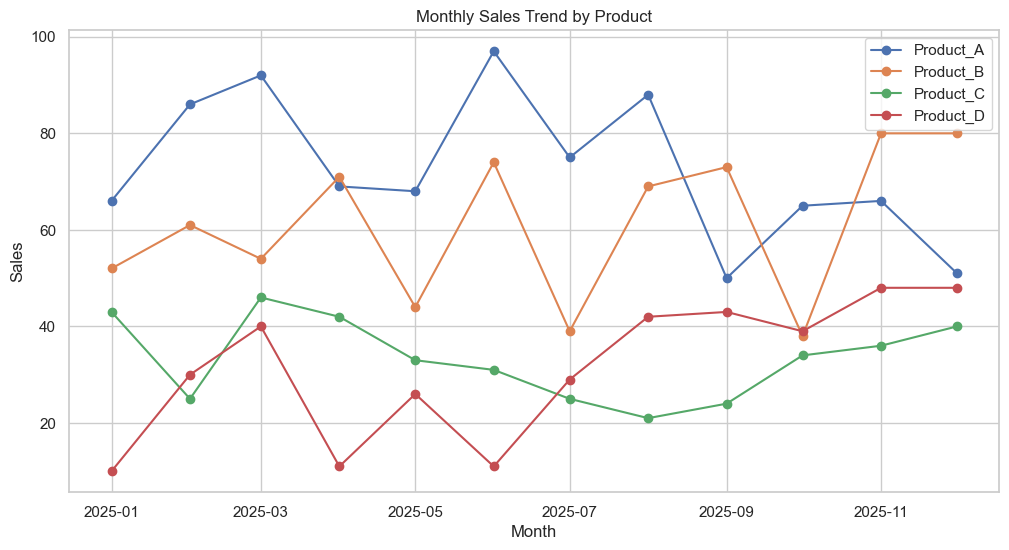

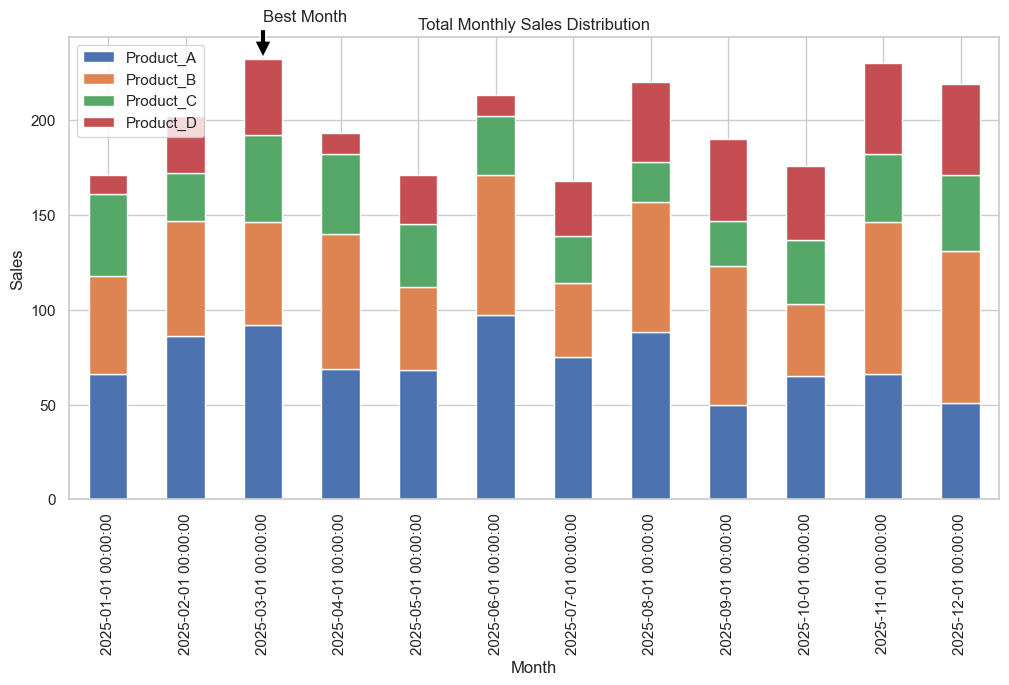

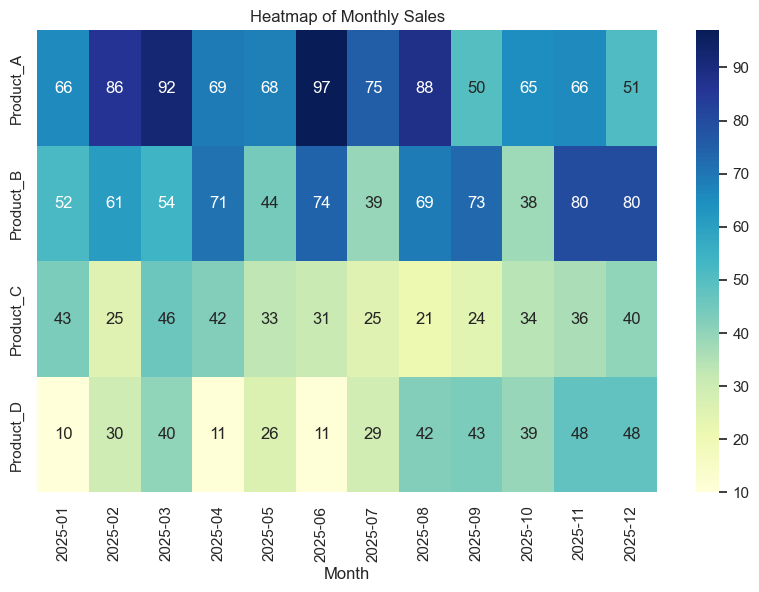

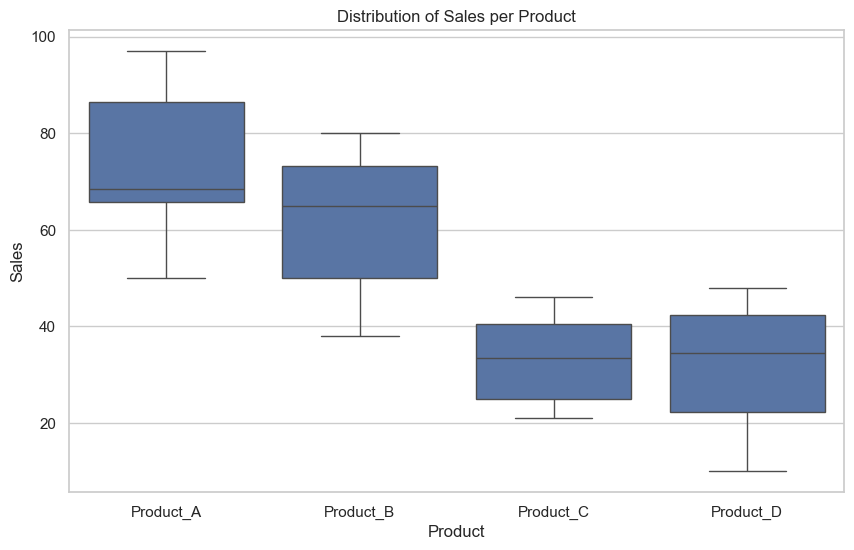

In [171]:
# Visualisations
sb.set_theme(style="whitegrid")

# 1:
plt.figure(figsize=(12, 6))
for product in AllProducts:
    plt.plot(df['Month'], df[product], marker='o', label=product)

plt.title('Monthly Sales Trend by Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 2:
df.set_index('Month')[AllProducts].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Monthly Sales Distribution')
plt.ylabel('Sales')

best_month_index = df['Total_Sales'].idxmax()
best_month_date = df.iloc[best_month_index]['Month']
plt.annotate('Best Month', 
             xy=(best_month_index, df.iloc[best_month_index]['Total_Sales']), 
             xytext=(best_month_index, df.iloc[best_month_index]['Total_Sales'] + 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# 3:
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Month')[AllProducts].T
heatmap_data.columns = heatmap_data.columns.strftime('%Y-%m')
sb.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Heatmap of Monthly Sales')
plt.show()

# 4:
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars=['Month'], value_vars=AllProducts, var_name='Product', value_name='Sales')
sb.boxplot(x='Product', y='Sales', data=df_melted)
plt.title('Distribution of Sales per Product')
plt.show()

        Step 6: Conclusion Questions
    The data we used in our code was generated on step one, and so the answer to these questions will change every time the code is ran. Therefore we're gonna answer strictly based on the data saved in this one iteration

1- Which product contributes the most to overall sales throughout the year? 
    * Looking at the "Best Product" calculation in the Key Insights cell, it's product A.
    this makes sense considering the data generated is between 50-100 sales a month, the highest of all products

2- Which quarter performs best and why?

    * Considering the fact that the number of sales is randomly generated across all months with no bias at all, the best quarter will change every time we run the code, in this case the best performaing quarter is Q4

3- How could this be used to improve strategy?
    * By knowing the month or the best quarter with the highest sales every year, we can use that information to perpare for those times in the next year by stocking up on products and such
    and this could also be used in the other direction too. If we had a month or a quarter with especially low sales, we can minimise our losses by not stocking up as much on those products for those times. Same thing with highest selling product and lowest selling product  